In [ ]:
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/seattle-weather.csv")
#df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather_prediction")
df.head()

,"{""cells"":[{""cell_type"":""code""","source:[""import pandas as pd\n""",import numpy as ny\n,import seaborn as sns\n,import matplotlib.pyplot as plt\n,from sklearn.ensemble import RandomForestClassifier\n,"from sklearn.metrics import classification_report,confusion_matrix\n","from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score\n","from sklearn.preprocessing import StandardScaler, LabelEncoder\n",%matplotlib inline\n],...,execution_count:null.11,outputs:[]}],"metadata:{""colab"":{""provenance"":[]",collapsed_sections:[],"authorship_tag:""ABX9TyPCUQTIPkUMM/h0lItbvJxq""}","kernelspec:{""display_name"":""Python 3""","name:""python3""}","language_info:{""name"":""python""}}",nbformat:4,nbformat_minor:0}


In [ ]:
df.isnull().sum()

{"cells":[{"cell_type":"code"            0.0
source:["import pandas as pd\n"          0.0
import numpy as ny\n                     0.0
import seaborn as sns\n                  0.0
import matplotlib.pyplot as plt\n        0.0
                                        ... 
kernelspec:{"display_name":"Python 3"    0.0
name:"python3"}                          0.0
language_info:{"name":"python"}}         0.0
nbformat:4                               0.0
nbformat_minor:0}                        0.0
Length: 239, dtype: float64

ValueError: ignored

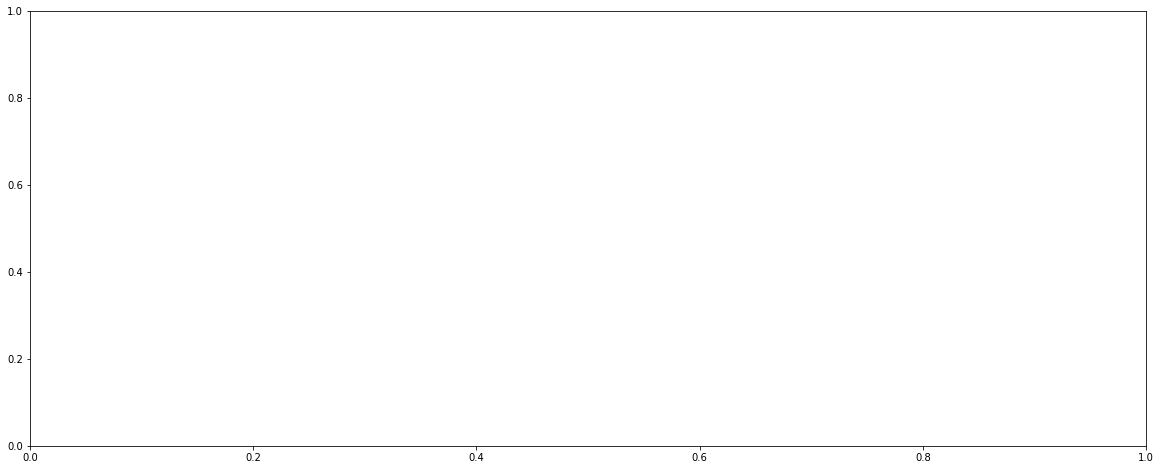

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='weather',y='precipitation',data=df,ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='weather',y='temp_max',data=df,ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='weather',y='temp_min',data=df,ax=ax)

In [ ]:
l = LabelEncoder()
df['weather']=l.fit_transform(df['weather'])
df['weather']

In [ ]:
df['weather'].value_counts()

In [ ]:
x=df.drop(['date','weather'],axis=1)
y=df['weather']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(xtrain,ytrain)
rfc.score(xtest,ytest)

In [ ]:
rfc2 = cross_val_score(estimator = rfc, X = xtrain, y = ytrain, cv = 10)
rfc2.mean()

In [ ]:
yp = rfc.predict(xtest)
c=confusion_matrix(ytest,yp)
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(c,ax=ax)

In [ ]:
c